In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [2]:
hr = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv')
hr_dummies = pd.get_dummies(hr)


train, test = train_test_split(hr_dummies,
                               test_size=0.3,
                               random_state=100)

In [3]:
train_x=train.drop('Attrition',axis=1)
train_y=train['Attrition']

test_x=test.drop('Attrition',axis=1)
test_y=test['Attrition']

model=AdaBoostClassifier(random_state=100, n_estimators=500)
model.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=500, random_state=100)

In [4]:
pred_test=model.predict(test_x)
print(accuracy_score(test_y,pred_test))
print(classification_report(test_y,pred_test))

0.8571428571428571
             precision    recall  f1-score   support

          0       0.90      0.93      0.92       371
          1       0.56      0.46      0.50        70

avg / total       0.85      0.86      0.85       441



In [5]:
model.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=186422792, splitter='best')

In [6]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image
    import os
    from sklearn import tree
    
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path

    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names=columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [7]:
draw_tree(model.estimators_[250],train_x.columns)
print(model.estimator_errors_[:5])
#print(model.estimator_proba_)

[0.16229349 0.34244608 0.36434203 0.40214249 0.40601838]


## Specifisity and Sensitivity 

In [8]:
pred_probs=pd.DataFrame(model.predict_proba(test_x),columns=['Neg','Pos'])
pred_test=pred_probs['Pos'].apply(lambda v: 1 if v>0.5 else 0)
print(pred_test)
print(classification_report(test_y,pred_test))

#i am ok to decrease a little bit of my specificity if my sensitivity is very high

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
411    0
412    0
413    0
414    0
415    0
416    0
417    0
418    0
419    1
420    0
421    0
422    0
423    0
424    0
425    0
426    0
427    0
428    0
429    0
430    0
431    0
432    0
433    1
434    1
435    1
436    1
437    0
438    0
439    1
440    0
Name: Pos, Length: 441, dtype: int64
             precision    recall  f1-score   support

          0       0.90      0.93      0.92       371
          1       0.56      0.46      0.50        70

avg / total       0.85      0.86      0.85       441



In [9]:
tn,fp,fn,tp=confusion_matrix(test_y,pred_test).ravel()
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)
print(sensitivity,specificity)

0.45714285714285713 0.9326145552560647


In [10]:
pred_test=pred_probs['Pos'].apply(lambda v: 1 if v>0.4994 else 0)
tn,fp,fn,tp=confusion_matrix(test_y,pred_test).ravel()
sensitivity=(tp)/(tp+fn)
specificity=(tn)/(tn+fp)
print(sensitivity,specificity)

0.4857142857142857 0.8867924528301887


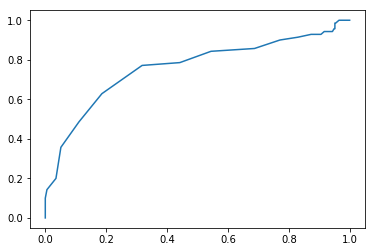

In [13]:
thresholds=[]
tpr=[]
fpr=[]
pred_probs=pd.DataFrame(model.predict_proba(test_x),columns=['Neg','Pos'])
for threshold in np.linspace(0,1,1000):
    pred_test=pred_probs['Pos'].apply(lambda v:1 if v > threshold else 0)
    tn,fp,fn,tp=confusion_matrix(test_y,pred_test).ravel()
    sens=(tp)/(tp+fn)
    spec=(tn)/(tn+fp)
    
    thresholds.append(thresholds)
    tpr.append(sens)
    fpr.append(1-spec)
plt.plot(fpr,tpr)

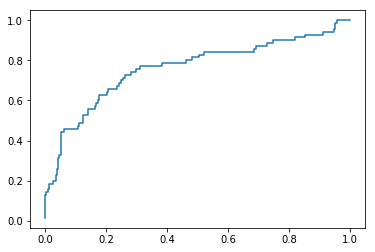

[0.50741782 0.50327021 0.5032061  0.50315286 0.50232719 0.50228595
 0.50212682 0.50205649 0.50197146 0.50187197 0.50164535 0.50164061
 0.50151973 0.5014139  0.50138626 0.5013225  0.50131191 0.50109972
 0.50105362 0.50080658 0.5007963  0.50069968 0.50056071 0.50022257
 0.50013339 0.50010827 0.49959668 0.49958293 0.49954824 0.49954428
 0.4993258  0.49927337 0.49910793 0.49891979 0.49876076 0.49873992
 0.49873305 0.49868929 0.49866895 0.49866847 0.49864511 0.49862544
 0.4983692  0.49835718 0.4983234  0.49831264 0.49817055 0.49816763
 0.49812474 0.49806983 0.49805067 0.49798979 0.49790084 0.49787194
 0.49784179 0.49781266 0.49765466 0.49760946 0.49757339 0.49755955
 0.4975311  0.49752325 0.49705051 0.497039   0.4964109  0.49638126
 0.49623825 0.49622177 0.49589374 0.49588551 0.49568905 0.49567392
 0.49454157 0.49450989 0.49446224 0.49444325 0.4939905  0.49394943
 0.49371934 0.49369676 0.49267215 0.49266668 0.49206695 0.4920053
 0.49011546 0.49010645 0.48680083 0.48678765 0.48495519 0.48354

In [18]:
tpr,fpr,thresholds=roc_curve(test_y,pred_probs['Pos'])
plt.plot(tpr,fpr)
plt.show()
print(thresholds)

In [28]:
fpr_ada_bst_300,tpr_ada_bst_300,thr_ada_bst_300=roc_curve(test_y,pred_probs['Pos'])
#plt.plot(fpr_ada_bst_300,tpr_ada_bst_300)

In [29]:
model_dt=DecisionTreeClassifier(random_state=100,max_depth=5)
model_dt.fit(train_x,train_y)
pred_probs_dt=pd.DataFrame(model_dt.predict_proba(test_x),columns=['Neg','Pos'])

fpr_dt_5,tpr_dt_5,thr_dt_5=roc_curve(test_y,pred_probs_dt['Pos'])

model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)
pred_probs_rf=pd.DataFrame(model_rf.predict_proba(test_x),columns=['Neg','Pos'])

fpr_rf_300,tpr_rf_300,thr_rf_300=roc_curve(test_y,pred_probs_rf['Pos'])

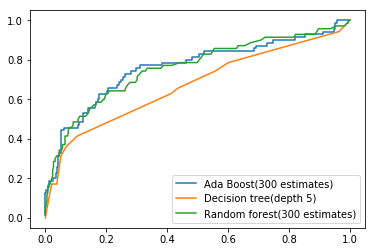

In [31]:
plt.plot(fpr_ada_bst_300,tpr_ada_bst_300)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_300,tpr_rf_300)
plt.legend(['Ada Boost(300 estimates)',
           'Decision tree(depth 5)',
           'Random forest(300 estimates)'])

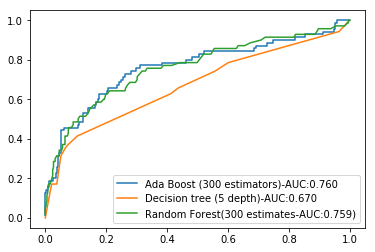

In [37]:
from sklearn.metrics import auc
auc_adabst_300=auc(fpr_ada_bst_300,tpr_ada_bst_300)
auc_dt_5=auc(fpr_dt_5,tpr_dt_5)
auc_rf_300=auc(fpr_rf_300,tpr_rf_300)

plt.plot(fpr_ada_bst_300,tpr_ada_bst_300)
plt.plot(fpr_dt_5,tpr_dt_5)
plt.plot(fpr_rf_300,tpr_rf_300)

plt.legend(['Ada Boost (300 estimators)-AUC:%.3f' %auc_adabst_300,
            'Decision tree (5 depth)-AUC:%.3f' %auc_dt_5,
           'Random Forest(300 estimates-AUC:%.3f)' %auc_rf_300])

# F1-score

In [48]:
from sklearn.metrics import f1_score

for threshold in np.linspace(0.49,0.5,100):
    pred_class=pred_probs['Pos'].apply(lambda v : 1if v> threshold else 0)
    print(threshold,f1_score(test_y,pred_class))

0.49 0.27789473684210525
0.4901010101010101 0.27789473684210525
0.4902020202020202 0.27484143763213525
0.4903030303030303 0.2760084925690021
0.4904040404040404 0.2760084925690021
0.4905050505050505 0.2760084925690021
0.4906060606060606 0.2760084925690021
0.4907070707070707 0.2765957446808511
0.4908080808080808 0.2771855010660981
0.4909090909090909 0.2771855010660981
0.491010101010101 0.278372591006424
0.4911111111111111 0.278372591006424
0.4912121212121212 0.2801724137931035
0.4913131313131313 0.28138528138528135
0.4914141414141414 0.2826086956521739
0.4915151515151515 0.2838427947598253
0.4916161616161616 0.28571428571428575
0.4917171717171717 0.28571428571428575
0.4918181818181818 0.28634361233480177
0.4919191919191919 0.28761061946902655
0.492020202020202 0.28381374722838143
0.4921212121212121 0.28444444444444444
0.4922222222222222 0.28507795100222716
0.49232323232323233 0.28699551569506726
0.49242424242424243 0.2882882882882883
0.49252525252525253 0.29024943310657597
0.492626262626

# Naive Bayes 

In [49]:
a=train[train['Attrition']==0].shape[0]
b=train['Attrition'].shape[0]
prob=a/b
prob

0.8377065111758989

In [44]:
## bayes theorem with a variable having categorical cols and 

(1029,)

In [53]:
pd.crosstab(train['Attrition'],train['Gender_Male']).sum()#by default colsum
#pd.crosstab(train['Attrition'],train['Gender_Male']).sum(axis=1)#row sums

Attrition
0    862
1    167
dtype: int64

In [56]:
temp=hr.loc[train.index]#row labels of the trains(train.index)
pd.crosstab(temp['Attrition'],temp['MaritalStatus']).sum()
pd.crosstab(temp['Attrition'],temp['MaritalStatus']).sum(axis=1)

Attrition
0    862
1    167
dtype: int64

# Binning numerical columns 

In [58]:
train['Age'].quantile([0,0.25,0.5,0.75,1])

0.00    18.0
0.25    30.0
0.50    36.0
0.75    42.0
1.00    60.0
Name: Age, dtype: float64

In [63]:
bins=train['Age'].quantile([0,0.25,0.5,0.75,1]).values
train['Age_Group']=np.digitize(train['Age'],bins=bins)
train['Age_Group']=train['Age_Group'].apply(lambda v: 'Group-'+str(v))
train[['Age','Age_Group']]

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Age_Group
178,46,Group-4
971,51,Group-4
1172,29,Group-1
667,41,Group-3
399,31,Group-2
634,25,Group-1
266,31,Group-2
210,32,Group-2
318,27,Group-1
239,32,Group-2
